<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/digitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)

len(x_test)

x_train[0].shape

11490434/11490434 [==============================] - 0s 0us/step


(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

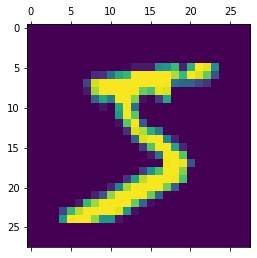

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [20]:
x_train_flattened.shape

(60000, 784)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4699 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9262


In [24]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2676 - accuracy: 0.9257


[0.2675504982471466, 0.9257000088691711]

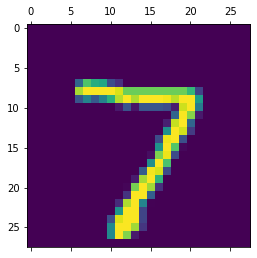

In [25]:
plt.matshow(x_test[0])

In [26]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 1ms/step


array([3.1489830e-02, 3.8822270e-07, 7.2484478e-02, 9.6541303e-01,
       5.1184692e-03, 1.6860309e-01, 2.2277827e-06, 9.9980444e-01,
       1.4285086e-01, 7.6577425e-01], dtype=float32)

In [27]:
np.argmax(y_predicted[0])

7

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    1,    2,    1,    7,   12,    3,    3,    0],
       [   0, 1110,    3,    2,    1,    2,    4,    2,   11,    0],
       [   3,    6,  921,   17,   12,    5,   13,   11,   41,    3],
       [   3,    0,   21,  914,    0,   25,    3,   12,   25,    7],
       [   1,    1,    2,    1,  930,    0,   12,    3,   10,   22],
       [   7,    3,    1,   31,   12,  780,   19,    4,   30,    5],
       [   7,    3,    4,    1,    7,    7,  924,    2,    3,    0],
       [   1,    5,   22,    5,    9,    1,    0,  947,    4,   34],
       [   5,    8,    6,   16,    9,   27,   10,   11,  877,    5],
       [  10,    7,    1,    9,   41,    8,    0,   20,   10,  903]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

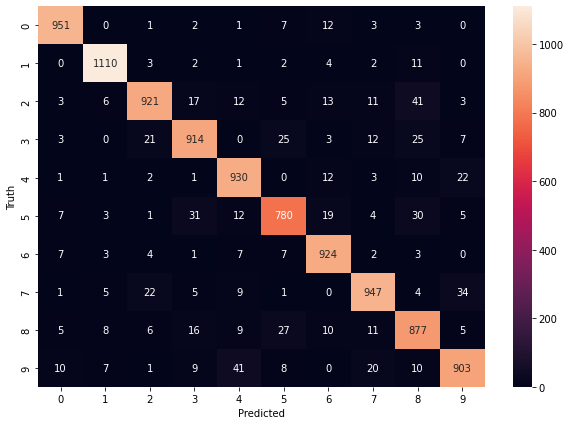

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')